# K-Prototypes Clustering

## Imports

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
from plotnine import *
import plotnine
# Imports module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load data

In [2]:
df = pd.read_csv('../data/training_data_2.csv', encoding='utf-8', sep=';')

### Print

In [3]:
# df.head()

In [4]:
print(len(df))

6018


## Data preprocessing

In [5]:
def get_browser(string):
    """
    input: string
    output: string
    generalizes the browser
    """
    if type(string)!=str:
        return None
    if 'Mozilla' in string:
        return 'Firefox'
    elif 'Firefox' in string:
        return 'Firefox'
    elif 'Safari' in string:
        return 'Safari'
    elif 'Edge' in string:
        return 'Edge'
    elif 'Chrome' in string:
        return 'Chrome'
    elif 'Samsung Internet' in string:
        return 'Samsung Internet'
    elif 'Google 1' in string or 'Google 6' in string:
        return 'Google'
    elif 'Facebook' in string or 'Snapchat' in string or 'Instagram' in string:
        return 'Réseau Social'
    elif 'Opera' in string:
        return 'Opera'
    else:
        return "Autre"
    
def get_os(string):
    """
    input: string
    output: string
    generalizes the os
    """
    if type(string)!=str:
        return None
    if 'iOS' in string:
        return 'iOS'
    elif 'Mac OS' in string:
        return 'Mac OS'
    elif 'Windows' in string:
        return 'Windows'
    elif 'Android' in string:
        return 'Android'
    elif 'Chrome OS' in string:
        return 'Chrome OS'
    elif 'Linux' in string:
        return 'Linux'
    elif 'Ubuntu' in string:
        return 'Ubuntu'
    else:
        return 'Autre'
    
def find_label(string: str):
    """
    input: a string
    output: the label (string format)
    finds the label of the conversation
    """
    if type(string)!=str:
        return None
    if 'loa' in string or 'lld' in string or 'location' in string:
        return 'location'
    elif 'occasion' in string:
        return 'vo'
    elif 'neuf' in string:
        return 'vn'
    elif 'entretien' in string or 'service' in string or 'apv' in string:
        return 'apv'
    else:
        return None
    
def preprocessing(df):
    """
    input: pandas DataFrame
    output: pandas DataFrame
    executes the previous functions and removes the null values
    """
    df['label'] = df['tags'].apply(find_label)
    df['os'] = df['os'].apply(get_os)
    df['browser'] = df['browser'].apply(get_browser)
    df = df.loc[:, ['status', 'day', 'hour', 'type_device', 'os', 'browser', 'conv_len']]
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [6]:
df = preprocessing(df)

In [7]:
# df.head()

### KPrototypes

In [8]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['status', 'day', 'type_device', 'os', 'browser']
Categorical columns position  : [0, 1, 3, 4, 5]


In [9]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
# print(dfMatrix)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


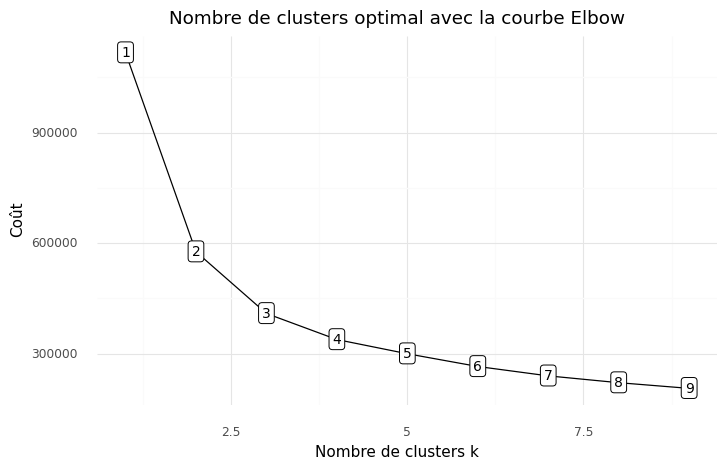

<ggplot: (132759257555)>

In [10]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Expection as e:
        print(e)

        
# print(len(cost))
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Nombre de clusters optimal avec la courbe Elbow')+
    xlab('Nombre de clusters k')+
    ylab('Coût')+
    theme_minimal()
)

In [11]:
# We choose k=3
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 2, 2, ..., 1, 2, 2], dtype=uint16)

In [12]:
# Displays the centroid values of our clusters (so the characteristics of each cluster found by the algorithm)
# kprototype.cluster_centroids_

In [13]:
# Check the iteration of the clusters created
# kprototype.n_iter_

In [14]:
# Check the cost of the clusters created
# kprototype.cost_

In [15]:
df['cluster_id'] = kprototype.labels_ 

In [16]:
# df

In [17]:
# df.to_csv("clustering.csv", index=False)